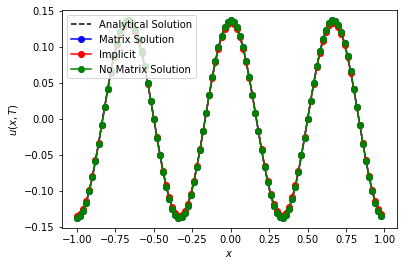

In [1]:
%matplotlib inline 
import numpy as np
from numpy import cos, sin, zeros, pi
from numpy.linalg import solve, norm
import matplotlib.pyplot as plt

from numpy import linspace, exp, diag, ones, append,delete,dot

# Solve: u_t - u_xx = f in [1,1]
#  with periodic boundary conditions

# analytical solution:
def uRef(t,x): 
    return exp(-t)*cos(3*pi*x)
# Right-hand side    
def f(t,x):
    return (9*pi**2-1)*exp(-t)*cos(3*pi*x)

# Grid
N = 100
T = 2.
x = linspace(-1,1,N+1)

# Leave off 1 point so initial condition is periodic in x
# (doesn't have a duplicate point)
x = delete(x,-1)
uWithMatrix = uRef(0,x)
uNoMatrix   = uRef(0,x)
uImplicit   = uRef(0,x)

dx = x[1]-x[0]
dt = dx**2/2

# Laplacian matrix:
A        = diag(-2*ones(N), 0)+ diag(ones(N-1), -1)+diag(np.ones(N-1), 1)
A[0,N-1] = 1
A[N-1,0] = 1
A        = A/dx**2

iLeft   = append(len(x)-1, range(0,len(x)-1))
iCenter = range(0,len(x))
iRight  = append(range(1,len(x)), 0)

Nt = int(1/dt)
for t in linspace(0,T-dt,Nt):
    f_val = f(t,x)
    uImplicit   = solve(1-A*dt, dt*f_val)
    uWithMatrix = uWithMatrix + dt*(dot(A,uWithMatrix) + f(t,x))
    uNoMatrix   = uNoMatrix + dt*((uNoMatrix[iLeft] - 2*uNoMatrix[iCenter] + uNoMatrix[iRight])/dx**2 + f(t,x))
    
uAnal = uRef(T-dt,x)

plt.plot(x, uAnal, 'k--', label='Analytical Solution')
plt.plot(x, uWithMatrix, 'b-o', label='Matrix Solution')
plt.plot(x,uImplicit, 'r-o', label='Implicit')
plt.plot(x, uNoMatrix, 'g-o', label='No Matrix Solution')
plt.xlabel(r"$x$")
plt.ylabel(r"$u(x,T)$")
plt.legend(fontsize=10,loc='upper left')